### Imports

In [1]:
import random
import pandas as pd
import glob
import os
from IPython.display import display
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error


### Data

In [2]:
### Individual Data Sets for 2023
#Creating a dictionary to store each DataFrame separately
dfs23 = {}
folder_path = "/Users/evanellington/Downloads/CS 230/Project Data/2023" 
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

for f in csv_files:
    # Use the filename (without path and extension) as the key
    key = os.path.splitext(os.path.basename(f))[0]
    dfs23[key] = pd.read_csv(f, encoding="ISO-8859-1")

# Accessing the individual data sets
QB_df23 = dfs23.get("2023_Stats(QBs)")
WR_df23 = dfs23.get("2023_Stats(WRs)")
RB_df23 = dfs23.get("2023_Stats(RBs)")
TE_df23 = dfs23.get("2023_Stats(TEs)")
K_df23 = dfs23.get("2023_Stats(Ks)")
DST_df23 = dfs23.get("2023_Stats(DSTs)")

In [3]:
### Individual Data Sets for 2024
# Creating a dictionary to store each DataFrame separately
dfs24 = {}
folder_path = "/Users/evanellington/Downloads/CS 230/Project Data/2024" 
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

for f in csv_files:
    # Use the filename (without path and extension) as the key
    key = os.path.splitext(os.path.basename(f))[0]
    dfs24[key] = pd.read_csv(f, encoding="ISO-8859-1")

# Accessing the individual data sets
QB_df24 = dfs24.get("2024_Stats(QBs)") 
WR_df24 = dfs24.get("2024_Stats(WRs)")
RB_df24 = dfs24.get("2024_Stats(RBs)")
TE_df24 = dfs24.get("2024_Stats(TEs)")
K_df24 = dfs24.get("2024_Stats(Ks)")
DST_df24 = dfs24.get("2024_Stats(DSTs)")

In [4]:
### Individual Data Sets for 2024
# Creating a dictionary to store each DataFrame separately
dfs = {}
folder_path = "/Users/evanellington/Downloads/CS 230/Project Data/2025" 
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

for f in csv_files:
    # Use the filename (without path and extension) as the key
    key = os.path.splitext(os.path.basename(f))[0]
    dfs[key] = pd.read_csv(f, encoding="ISO-8859-1")

# Accessing the individual data sets
QB_df25 = dfs.get("2025_Stats (QBs)")
WR_df25 = dfs.get("2025_Stats (WRs)")
RB_df25 = dfs.get("2025_Stats (RBs)")
TE_df25 = dfs.get("2025_Stats (TEs)")
K_df25 = dfs.get("2025_Stats (Ks)")
DST_df25 = dfs.get("2025_Stats (DSTs)")


### Positional Models

#### QB Model

Epoch 1/200


/Users/evanellington/.julia/conda/3/aarch64/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 - 1s - 100ms/step - loss: 0.9881 - val_loss: 0.9156
Epoch 2/200
5/5 - 0s - 5ms/step - loss: 0.9644 - val_loss: 0.8502
Epoch 3/200
5/5 - 0s - 5ms/step - loss: 0.9444 - val_loss: 0.7900
Epoch 4/200
5/5 - 0s - 5ms/step - loss: 0.8071 - val_loss: 0.7358
Epoch 5/200
5/5 - 0s - 5ms/step - loss: 0.8646 - val_loss: 0.7034
Epoch 6/200
5/5 - 0s - 5ms/step - loss: 0.8364 - val_loss: 0.6964
Epoch 7/200
5/5 - 0s - 5ms/step - loss: 0.7895 - val_loss: 0.6895
Epoch 8/200
5/5 - 0s - 5ms/step - loss: 0.7099 - val_loss: 0.6818
Epoch 9/200
5/5 - 0s - 4ms/step - loss: 0.6861 - val_loss: 0.6695
Epoch 10/200
5/5 - 0s - 5ms/step - loss: 0.6914 - val_loss: 0.6544
Epoch 11/200
5/5 - 0s - 5ms/step - loss: 0.6245 - val_loss: 0.6414
Epoch 12/200
5/5 - 0s - 5ms/step - loss: 0.6563 - val_loss: 0.6292
Epoch 13/200
5/5 - 0s - 20ms/step - loss: 0.5877 - val_loss: 0.6189
Epoch 14/200
5/5 - 0s - 9ms/step - loss: 0.6349 - val_loss: 0.6110
Epoch 15/200
5/5 - 0s - 9ms/step - loss: 0.6274 - val_loss: 0.6045
Epoch 16/200


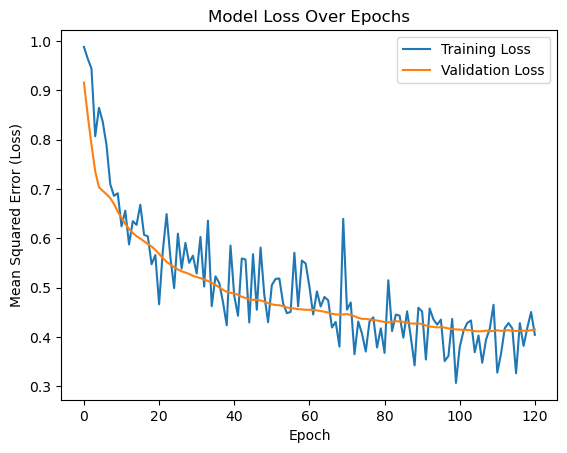

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Validation R² Score: 0.5146
Validation RMSE: 121.1428


In [5]:
#setting random seed
SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# ------TRAINING------ #
#
df_trainQB = QB_df23.merge(
    QB_df24[['Name', 'FantasyPoints']], 
    on='Name',
    how='inner',            
    suffixes=('_2023', '_2024')
)

# Saving columns to learn from
feature_cols = df_trainQB.drop(columns=['Name', 'FantasyPoints_2024','Name_pos_team','Team','Position']).columns


X_train_dfQB = df_trainQB[feature_cols]
y_train_dfQB = df_trainQB['FantasyPoints_2024']

# Handling NaN values in the data and Converting all data to floats
X_trainQB = X_train_dfQB.apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy(np.float32)
y_trainQB = y_train_dfQB.apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy() # Keep as 1D array for now

# feature scaling
scaler = StandardScaler()
X_train_scaledQB = scaler.fit_transform(X_trainQB)
y_scaler = StandardScaler()
y_train_scaledQB = y_scaler.fit_transform(y_trainQB.reshape(-1, 1)).astype(np.float32)


# ------MODEL------ #
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_trainQB.shape[1],)),
    Dense(8, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')  
])

# Compile the model with Adam optimizer and MSE loss
model.compile(optimizer='adam', loss='mse')

# Train the model with early stopping
es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(
    X_train_scaledQB, y_train_scaledQB,
    validation_split=0.15,
    epochs=200,
    batch_size=16,
    callbacks=[es],
    verbose=2
)

# Plotting loss across epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Mean Squared Error (Loss)')
plt.xlabel('Epoch')
plt.legend()
plt.show()


X = X_train_scaledQB
y = y_trainQB  
# scaling target values
y_scaled = y_train_scaledQB 

# Split data into training and validation sets (85% train, 15% validation)
X_train, X_val, y_train_true, y_val_true = train_test_split(
    X, y, test_size=0.15, random_state = 42)

# Predict fantasy points for the validation set using the trained model
y_val_pred_scaled = model.predict(X_val)

# Convert scaled predictions back to the original fantasy points scale
y_val_pred = y_scaler.inverse_transform(y_val_pred_scaled)

# Compute evaluation metrics: R² indicates proportion of variance explained, RMSE is prediction error
r2 = r2_score(y_val_true, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred))

print(f"\nValidation R² Score: {r2:.4f}")
print(f"Validation RMSE: {rmse:.4f}")

   

In [6]:
# ------PREDICTION (TESTING)------ #
# Predict 2025 Points using 2024 Stats

# Copy 2024 QB data to avoid modifying original dataframe
df_testQB = QB_df24.copy()

X_test_dfQB = df_testQB.drop(columns=['Name', 'FantasyPoints', 'Name_pos_team', 'Team', 'Position'])
X_test_dfQB = X_test_dfQB.reindex(columns=feature_cols, fill_value=0)
X_testQB = X_test_dfQB.apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy(np.float32)

# Scale test features using the SAME scaler fitted on training data
X_test_scaledQB = scaler.transform(X_testQB)

# Predict the SCALED Fantasy Points
predictions_scaledQB = model.predict(X_test_scaledQB)

# Inverse Transform to get the actual Fantasy Points values
predictions_2025QB = y_scaler.inverse_transform(predictions_scaledQB) 

print("\n--- Predicted 2025 Fantasy Points (based on 2024 stats) ---")
# Combine predictions with player names for readability
df_testQB['Predicted_2025_FP'] = predictions_2025QB.flatten()
QB = df_testQB[['Name', 'Predicted_2025_FP', 'FantasyPoints', "Position", "ADP"]].sort_values(by='Predicted_2025_FP', ascending=False)
print(QB)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

--- Predicted 2025 Fantasy Points (based on 2024 stats) ---
               Name  Predicted_2025_FP FantasyPoints Position    ADP
0     Lamar Jackson         418.023071         511.6       QB   38.0
1        Joe Burrow         354.935638         458.5       QB   68.0
4    Jayden Daniels         329.399139         405.1       QB  100.5
10  Patrick Mahomes         312.613068         334.4       QB   33.0
3        Josh Allen         311.278015         434.4       QB   22.0
..              ...                ...           ...      ...    ...
44   Marcus Mariota          18.876148          53.8       QB  350.0
38        Drew Lock          17.284855          91.9       QB  350.0
43     Malik Willis          14.806789          57.7       QB  350.0
42    Tyler Huntley          14.199856          66.4       QB  350.0
40  Spencer Rattler          -3.764202          75.1       QB  350.0

[100 rows x 5 columns]


#### RB Model

Epoch 1/200


/Users/evanellington/.julia/conda/3/aarch64/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 - 1s - 284ms/step - loss: 0.9354 - val_loss: 1.3845
Epoch 2/200
4/4 - 0s - 9ms/step - loss: 1.0291 - val_loss: 1.3123
Epoch 3/200
4/4 - 0s - 9ms/step - loss: 0.9634 - val_loss: 1.2360
Epoch 4/200
4/4 - 0s - 9ms/step - loss: 0.9238 - val_loss: 1.1556
Epoch 5/200
4/4 - 0s - 10ms/step - loss: 0.8937 - val_loss: 1.0854
Epoch 6/200
4/4 - 0s - 8ms/step - loss: 0.8777 - val_loss: 1.0209
Epoch 7/200
4/4 - 0s - 9ms/step - loss: 0.8788 - val_loss: 0.9649
Epoch 8/200
4/4 - 0s - 8ms/step - loss: 0.8466 - val_loss: 0.9108
Epoch 9/200
4/4 - 0s - 8ms/step - loss: 0.9274 - val_loss: 0.8629
Epoch 10/200
4/4 - 0s - 8ms/step - loss: 0.8358 - val_loss: 0.8148
Epoch 11/200
4/4 - 0s - 8ms/step - loss: 0.8150 - val_loss: 0.7797
Epoch 12/200
4/4 - 0s - 7ms/step - loss: 0.8278 - val_loss: 0.7528
Epoch 13/200
4/4 - 0s - 6ms/step - loss: 0.7872 - val_loss: 0.7291
Epoch 14/200
4/4 - 0s - 6ms/step - loss: 0.8812 - val_loss: 0.7045
Epoch 15/200
4/4 - 0s - 6ms/step - loss: 0.7779 - val_loss: 0.6832
Epoch 16/200


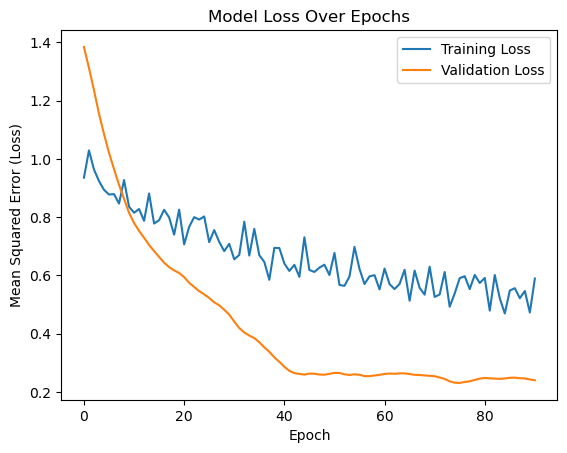

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Validation R² Score: 0.4122
Validation RMSE: 73.9066


In [7]:
SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# ------TRAINING------ #
#
df_trainRB = RB_df23.merge(
    RB_df24[['Name', 'FantasyPoints']], 
    on='Name',
    how='inner',               
    suffixes=('_2023', '_2024')
)

# Saving columns to learn from
feature_cols = df_trainRB.drop(columns=['Name', 'FantasyPoints_2024','Name_pos_team','Position']).columns


X_train_dfRB = df_trainRB[feature_cols]
y_train_dfRB = df_trainRB['FantasyPoints_2024']

# Handling NaN values in the data and Converting all data to floats
X_trainRB = X_train_dfRB.apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy(np.float32)
y_trainRB = y_train_dfRB.apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy() # Keep as 1D array for now

# feature scaling
scaler = StandardScaler()
X_train_scaledRB = scaler.fit_transform(X_trainRB) # Features are scaled
y_scaler = StandardScaler()
y_train_scaledRB = y_scaler.fit_transform(y_trainRB.reshape(-1, 1)).astype(np.float32)


# ------MODEL------ #
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_trainRB.shape[1],)),
    Dense(8, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')  
])

# Compile the model with Adam optimizer and MSE loss
model.compile(optimizer='adam', loss='mse')

# Train the model with early stopping
es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(
    X_train_scaledRB, y_train_scaledRB,
    validation_split=0.15,
    epochs=200,
    batch_size=16,
    callbacks=[es],
    verbose=2
)

# Plotting loss across epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Mean Squared Error (Loss)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# ----- Compute R² on the validation set -----

X = X_train_scaledRB
y = y_trainRB  
# scaling target values
y_scaled = y_train_scaledRB 

# Split data into training and validation sets (85% train, 15% validation)
X_train, X_val, y_train_true, y_val_true = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# Predict fantasy points for the validation set using the trained model
y_val_pred_scaled = model.predict(X_val)

# Convert scaled predictions back to the original fantasy points scale
y_val_pred = y_scaler.inverse_transform(y_val_pred_scaled)

# Compute evaluation metrics: R² indicates proportion of variance explained, RMSE is prediction error
r2 = r2_score(y_val_true, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred))

print(f"\nValidation R² Score: {r2:.4f}")
print(f"Validation RMSE: {rmse:.4f}")


In [8]:
# ------PREDICTION (TESTING)------ #
# Predict 2025 Points using 2024 Stats

# Copy 2024 RB data to avoid modifying original dataframe
df_testRB = RB_df24.copy()

X_test_dfRB = df_testRB.drop(columns=['Name', 'FantasyPoints', 'Name_pos_team', 'Position']) 
X_test_dfRB = X_test_dfRB.reindex(columns=feature_cols, fill_value=0)
X_testRB = X_test_dfRB.apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy(np.float32)

# Scale test features using the SAME scaler fitted on training data
X_test_scaledRB = scaler.transform(X_testRB)

# Predict the SCALED Fantasy Points
predictions_scaledRB = model.predict(X_test_scaledRB)

# Inverse Transform to get the actual Fantasy Points values
predictions_2025RB = y_scaler.inverse_transform(predictions_scaledRB) 

print("\n--- Predicted 2025 Fantasy Points (based on 2024 stats) ---")
# Combine predictions with player names for readability
df_testRB['Predicted_2025_FP'] = predictions_2025RB.flatten()
RB = df_testRB[['Name', 'Predicted_2025_FP', 'FantasyPoints', 'Position', 'ADP']].sort_values(by='Predicted_2025_FP', ascending=False)
print(RB)
print(RB['Predicted_2025_FP'].head(15).sum())

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

--- Predicted 2025 Fantasy Points (based on 2024 stats) ---
                 Name  Predicted_2025_FP  FantasyPoints Position    ADP
1      Saquon Barkley         277.478638          355.3       RB   10.5
6      Kyren Williams         246.025909          272.1       RB   18.0
3       Derrick Henry         239.199371          336.4       RB   19.0
12    Jonathan Taylor         232.980606          244.7       RB   10.5
13      Chuba Hubbard         231.571854          241.8       RB  119.0
..                ...                ...            ...      ...    ...
58   Jeremy McNichols          70.238663           63.9       RB  350.0
97     Kenny McIntosh          67.943542           22.4       RB  350.0
91  Sincere McCormick          59.447689           27.2       RB  350.0
65    Emari Demercado          57.167484           54.7       RB  350.0
72      Dameon Pierce          40.161587           43.5       RB  220.5

[100 rows x 5 columns]
3207.606


#### WR Model

Epoch 1/200


/Users/evanellington/.julia/conda/3/aarch64/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 - 1s - 188ms/step - loss: 1.1382 - val_loss: 0.3779
Epoch 2/200
4/4 - 0s - 8ms/step - loss: 1.0201 - val_loss: 0.3623
Epoch 3/200
4/4 - 0s - 6ms/step - loss: 1.0344 - val_loss: 0.3483
Epoch 4/200
4/4 - 0s - 6ms/step - loss: 1.0185 - val_loss: 0.3377
Epoch 5/200
4/4 - 0s - 7ms/step - loss: 1.0091 - val_loss: 0.3276
Epoch 6/200
4/4 - 0s - 7ms/step - loss: 0.9618 - val_loss: 0.3136
Epoch 7/200
4/4 - 0s - 6ms/step - loss: 0.9206 - val_loss: 0.3007
Epoch 8/200
4/4 - 0s - 6ms/step - loss: 0.9296 - val_loss: 0.2922
Epoch 9/200
4/4 - 0s - 6ms/step - loss: 0.8958 - val_loss: 0.2840
Epoch 10/200
4/4 - 0s - 6ms/step - loss: 0.8816 - val_loss: 0.2758
Epoch 11/200
4/4 - 0s - 6ms/step - loss: 0.8513 - val_loss: 0.2690
Epoch 12/200
4/4 - 0s - 6ms/step - loss: 0.8187 - val_loss: 0.2657
Epoch 13/200
4/4 - 0s - 6ms/step - loss: 0.8726 - val_loss: 0.2631
Epoch 14/200
4/4 - 0s - 6ms/step - loss: 0.8432 - val_loss: 0.2601
Epoch 15/200
4/4 - 0s - 6ms/step - loss: 0.8776 - val_loss: 0.2576
Epoch 16/200
4

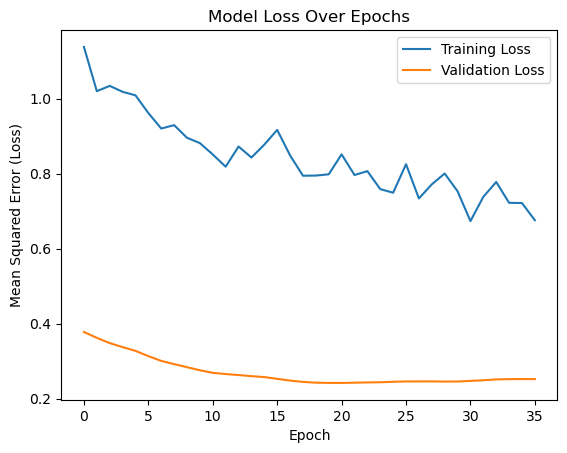

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Validation R² Score: 0.5134
Validation RMSE: 42.5713


In [9]:
SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# ------TRAINING------ #
#
df_trainWR = WR_df23.merge(
    WR_df24[['Name', 'FantasyPoints']], 
    on='Name',
    how='inner',               
    suffixes=('_2023', '_2024')
)

# Saving columns to learn from
feature_cols = df_trainWR.drop(columns=['Name', 'FantasyPoints_2024','Name_pos_team','Position']).columns

X_train_dfWR = df_trainWR[feature_cols]
y_train_dfWR = df_trainWR['FantasyPoints_2024']

# Handling NaN values in the data and Converting all data to floats
X_trainWR = X_train_dfWR.apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy(np.float32)
y_trainWR = y_train_dfWR.apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy() # Keep as 1D array for now

# feature scaling
scaler = StandardScaler()
X_train_scaledWR = scaler.fit_transform(X_trainWR) # Features are scaled
y_scaler = StandardScaler()
y_train_scaledWR = y_scaler.fit_transform(y_trainWR.reshape(-1, 1)).astype(np.float32)


# ------MODEL------ #
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_trainWR.shape[1],)),
    Dense(8, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')  
])

# Compile the model with Adam optimizer and MSE loss
model.compile(optimizer='adam', loss='mse')

# Train the model with early stopping 
es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(
    X_train_scaledWR, y_train_scaledWR,
    validation_split=0.15,
    epochs=200,
    batch_size=16,
    callbacks=[es],
    verbose=2
)

# Plotting loss across epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Mean Squared Error (Loss)')
plt.xlabel('Epoch')
plt.legend()
plt.show()


X = X_train_scaledWR
y = y_trainWR  
# scaling target values
y_scaled = y_train_scaledWR 

# Split data into training and validation sets (85% train, 15% validation)
X_train, X_val, y_train_true, y_val_true = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# Predict fantasy points for the validation set using the trained model
y_val_pred_scaled = model.predict(X_val)

# Convert scaled predictions back to the original fantasy points scale
y_val_pred = y_scaler.inverse_transform(y_val_pred_scaled)

# Compute evaluation metrics: R² indicates proportion of variance explained, RMSE is prediction error
r2 = r2_score(y_val_true, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred))

print(f"\nValidation R² Score: {r2:.4f}")
print(f"Validation RMSE: {rmse:.4f}")

In [10]:
# ------PREDICTION (TESTING)------ #
# Predict 2025 Points using 2024 Stats

# Copy 2024 WR data to avoid modifying original dataframe
df_testWR = WR_df24.copy()

X_test_dfWR = df_testWR.drop(columns=['Name', 'FantasyPoints', 'Name_pos_team', 'Position']) 
X_test_dfWR = X_test_dfWR.reindex(columns=feature_cols, fill_value=0)
X_testWR = X_test_dfWR.apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy(np.float32)

# Scale test features using the SAME scaler fitted on training data
X_test_scaledWR = scaler.transform(X_testWR)

# Predict the SCALED Fantasy Points
predictions_scaledWR = model.predict(X_test_scaledWR)

# Inverse Transform to get the actual Fantasy Points values
predictions_2025WR = y_scaler.inverse_transform(predictions_scaledWR) 

print("\n--- Predicted 2025 Fantasy Points (based on 2024 stats) ---")
# Combine predictions with player names for readability
df_testWR['Predicted_2025_FP'] = predictions_2025WR.flatten()
WR = df_testWR[['Name', 'Predicted_2025_FP', 'FantasyPoints', 'Position', 'ADP']].sort_values(by='Predicted_2025_FP', ascending=False)
print(WR)
print(WR['Predicted_2025_FP'].head(15).sum())

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

--- Predicted 2025 Fantasy Points (based on 2024 stats) ---
                Name  Predicted_2025_FP  FantasyPoints Position    ADP
22      Nico Collins         191.262238          210.6       WR   29.0
0      Ja'Marr Chase         190.409821          403.0       WR    6.5
16       Tee Higgins         187.216675          222.1       WR   60.5
14        Mike Evans         187.036346          240.4       WR   37.5
13     Ladd McConkey         186.503601          240.9       WR   99.5
..               ...                ...            ...      ...    ...
87       David Moore         138.680801           85.1       WR  350.0
91        Tyler Boyd         137.345078           78.3       WR  254.0
77       Tutu Atwell         135.228073           98.9       WR  350.0
98   Kendrick Bourne         133.902161           65.1       WR  292.5
90  Sterling Shepard         128.695740           80.3       WR  350.0

[100 rows x 5 columns]
2779.4111


#### TE Model

Epoch 1/200


/Users/evanellington/.julia/conda/3/aarch64/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 - 0s - 96ms/step - loss: 1.0356 - val_loss: 1.1496
Epoch 2/200
5/5 - 0s - 5ms/step - loss: 0.9140 - val_loss: 1.0777
Epoch 3/200
5/5 - 0s - 5ms/step - loss: 0.8841 - val_loss: 1.0221
Epoch 4/200
5/5 - 0s - 5ms/step - loss: 0.9351 - val_loss: 0.9717
Epoch 5/200
5/5 - 0s - 5ms/step - loss: 0.8567 - val_loss: 0.9314
Epoch 6/200
5/5 - 0s - 5ms/step - loss: 0.8385 - val_loss: 0.8953
Epoch 7/200
5/5 - 0s - 5ms/step - loss: 0.7967 - val_loss: 0.8630
Epoch 8/200
5/5 - 0s - 5ms/step - loss: 0.8433 - val_loss: 0.8348
Epoch 9/200
5/5 - 0s - 5ms/step - loss: 0.8362 - val_loss: 0.8116
Epoch 10/200
5/5 - 0s - 5ms/step - loss: 0.8039 - val_loss: 0.7937
Epoch 11/200
5/5 - 0s - 5ms/step - loss: 0.7839 - val_loss: 0.7779
Epoch 12/200
5/5 - 0s - 5ms/step - loss: 0.7783 - val_loss: 0.7634
Epoch 13/200
5/5 - 0s - 6ms/step - loss: 0.6546 - val_loss: 0.7473
Epoch 14/200
5/5 - 0s - 5ms/step - loss: 0.8038 - val_loss: 0.7311
Epoch 15/200
5/5 - 0s - 5ms/step - loss: 0.7191 - val_loss: 0.7176
Epoch 16/200
5/

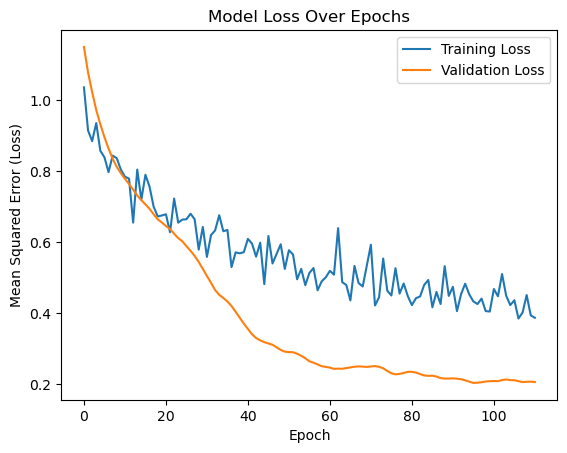

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Validation R² Score: 0.7627
Validation RMSE: 32.4980


In [11]:
SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)


# ------TRAINING------ #
#
df_trainTE = TE_df23.merge(
    TE_df24[['Name', 'FantasyPoints']], 
    on='Name',
    how='inner',               
    suffixes=('_2023', '_2024')
)

# Saving columns to learn from
feature_cols = df_trainTE.drop(columns=['Name', 'FantasyPoints_2024','Name_pos_team','Position']).columns

X_train_dfTE = df_trainTE[feature_cols]
y_train_dfTE = df_trainTE['FantasyPoints_2024']

# Handling NaN values in the data and Converting all data to floats
X_trainTE = X_train_dfTE.apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy(np.float32)
y_trainTE = y_train_dfTE.apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy() # Keep as 1D array for now

# feature scaling
scaler = StandardScaler()
X_train_scaledTE = scaler.fit_transform(X_trainTE) # Features are scaled
y_scaler = StandardScaler()
y_train_scaledTE = y_scaler.fit_transform(y_trainTE.reshape(-1, 1)).astype(np.float32)


# ------MODEL------ #
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_trainTE.shape[1],)),
    Dense(8, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')  
])

# Compile the model with Adam optimizer and MSE loss
model.compile(optimizer='adam', loss='mse')

# Train the model with early stopping
es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(
    X_train_scaledTE, y_train_scaledTE,
    validation_split=0.15,
    epochs=200,
    batch_size=16,
    callbacks=[es],
    verbose=2
)

# Plotting loss across epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Mean Squared Error (Loss)')
plt.xlabel('Epoch')
plt.legend()
plt.show()


X = X_train_scaledTE
y = y_trainTE  
# scaling target values
y_scaled = y_train_scaledTE  

# Split data into training and validation sets (85% train, 15% validation)
X_train, X_val, y_train_true, y_val_true = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# Predict fantasy points for the validation set using the trained model
y_val_pred_scaled = model.predict(X_val)

# Convert scaled predictions back to the original fantasy points scale
y_val_pred = y_scaler.inverse_transform(y_val_pred_scaled)

# Compute evaluation metrics: R² indicates proportion of variance explained, RMSE is prediction error
r2 = r2_score(y_val_true, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred))

print(f"\nValidation R² Score: {r2:.4f}")
print(f"Validation RMSE: {rmse:.4f}")

In [12]:
# ------PREDICTION (TESTING)------ #
# Predict 2025 Points using 2024 Stats

# Copy 2024 TE data to avoid modifying original dataframe
df_testTE = TE_df24.copy()

X_test_dfTE = df_testTE.drop(columns=['Name', 'FantasyPoints', 'Name_pos_team', 'Position'])
X_test_dfTE = X_test_dfTE.reindex(columns=feature_cols, fill_value=0)
X_testTE = X_test_dfTE.apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy(np.float32)

# Scale test features using the SAME scaler fitted on training data
X_test_scaledTE = scaler.transform(X_testTE)

# Predict the SCALED Fantasy Points
predictions_scaledTE = model.predict(X_test_scaledTE)

# Inverse Transform to get the actual Fantasy Points values
predictions_2025TE = y_scaler.inverse_transform(predictions_scaledTE) 

print("\n--- Predicted 2025 Fantasy Points (based on 2024 stats) ---")
# Combine predictions with player names for readability
df_testTE['Predicted_2025_FP'] = predictions_2025TE.flatten()
TE = df_testTE[['Name', 'Predicted_2025_FP', 'FantasyPoints', "Position", 'ADP']].sort_values(by='Predicted_2025_FP', ascending=False)
print(TE)
print(TE['Predicted_2025_FP'].head(15).sum())

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

--- Predicted 2025 Fantasy Points (based on 2024 stats) ---
               Name  Predicted_2025_FP  FantasyPoints Position    ADP
2     George Kittle         213.776459          236.6       TE   64.5
5      Mark Andrews         183.208359          188.8       TE   49.5
0      Brock Bowers         180.242188          263.1       TE   91.5
1      Trey McBride         165.104568          243.8       TE   48.5
7       Sam LaPorta         162.489594          174.6       TE   31.0
..              ...                ...            ...      ...    ...
66  Andrew Ogletree          31.027859           25.9       TE  350.0
62    Charlie Kolar          26.903439           28.3       TE  350.0
48    Adam Trautman          26.446144           43.8       TE  350.0
60    Kylen Granson          23.406891           32.2       TE  350.0
80       Devin Culp          21.749390           13.8       TE  350.0

[100 rows x 5 columns]
2289.2087


#### K Model

Epoch 1/200


/Users/evanellington/.julia/conda/3/aarch64/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 - 0s - 100ms/step - loss: 1.0051 - val_loss: 1.0064
Epoch 2/200
4/4 - 0s - 7ms/step - loss: 0.9595 - val_loss: 1.0274
Epoch 3/200
4/4 - 0s - 6ms/step - loss: 0.9220 - val_loss: 1.0473
Epoch 4/200
4/4 - 0s - 8ms/step - loss: 0.8893 - val_loss: 1.0610
Epoch 5/200
4/4 - 0s - 8ms/step - loss: 0.8599 - val_loss: 1.0800
Epoch 6/200
4/4 - 0s - 8ms/step - loss: 0.8334 - val_loss: 1.1005
Epoch 7/200
4/4 - 0s - 8ms/step - loss: 0.8094 - val_loss: 1.1199
Epoch 8/200
4/4 - 0s - 8ms/step - loss: 0.7871 - val_loss: 1.1368
Epoch 9/200
4/4 - 0s - 9ms/step - loss: 0.7664 - val_loss: 1.1516
Epoch 10/200
4/4 - 0s - 9ms/step - loss: 0.7491 - val_loss: 1.1650
Epoch 11/200
4/4 - 0s - 8ms/step - loss: 0.7334 - val_loss: 1.1770
Epoch 12/200
4/4 - 0s - 8ms/step - loss: 0.7188 - val_loss: 1.1883
Epoch 13/200
4/4 - 0s - 8ms/step - loss: 0.7051 - val_loss: 1.1992
Epoch 14/200
4/4 - 0s - 8ms/step - loss: 0.6919 - val_loss: 1.2107
Epoch 15/200
4/4 - 0s - 8ms/step - loss: 0.6790 - val_loss: 1.2243
Epoch 16/200
4

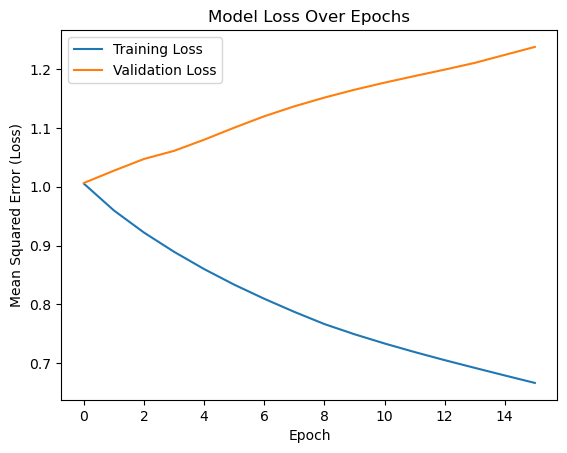

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Validation R² Score: -0.1805
Validation RMSE: 17.0997


In [13]:
SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)


# ------TRAINING------ #
#
df_trainK = K_df23.merge(
    K_df24[['Name', 'FantasyPoints']], 
    on='Name',
    how='inner',              
    suffixes=('_2023', '_2024')
)

# Saving columns to learn from
feature_cols = df_trainK.drop(columns=['Name', 'FantasyPoints_2024','Name_pos_team','Position']).columns


X_train_dfK = df_trainK[feature_cols]
y_train_dfK = df_trainK['FantasyPoints_2024']

# Handling NaN values in the data and Converting all data to floats
X_trainK = X_train_dfK.apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy(np.float32)
y_trainK = y_train_dfK.apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy() 

# feature scaling
scaler = StandardScaler()
X_train_scaledK = scaler.fit_transform(X_trainK) 
y_scaler = StandardScaler()
y_train_scaledK = y_scaler.fit_transform(y_trainK.reshape(-1, 1)).astype(np.float32)


# ------MODEL------ #
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_trainK.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')  
])

# Compile the model with Adam optimizer and MSE loss
model.compile(optimizer='adam', loss='mse')

# Train the model with early stopping
es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(
    X_train_scaledK, y_train_scaledK,
    validation_split=0.15,
    epochs=200,
    batch_size=8,
    callbacks=[es],
    verbose=2
)

# Plotting loss across epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Mean Squared Error (Loss)')
plt.xlabel('Epoch')
plt.legend()
plt.show()


X = X_train_scaledK
y = y_trainK 
# scaling target values
y_scaled = y_train_scaledK  

# Split data into training and validation sets (85% train, 15% validation)
X_train, X_val, y_train_true, y_val_true = train_test_split(
    X, y, test_size=0.10, random_state=42
)

# Predict fantasy points for the validation set using the trained model
y_val_pred_scaled = model.predict(X_val)

# Convert scaled predictions back to the original fantasy points scale
y_val_pred = y_scaler.inverse_transform(y_val_pred_scaled)

# Compute evaluation metrics: R² indicates proportion of variance explained, RMSE is prediction error
r2 = r2_score(y_val_true, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred))

print(f"\nValidation R² Score: {r2:.4f}")
print(f"Validation RMSE: {rmse:.4f}")

In [14]:
# ------PREDICTION (TESTING)------ #
# Predict 2025 Points using 2024 Stats

# Copy 2024 K data to avoid modifying original dataframe
df_testK = K_df24.copy()

X_test_dfK = df_testK.drop(columns=['Name', 'FantasyPoints', 'Name_pos_team', 'Position']) 
X_test_dfK = X_test_dfK.reindex(columns=feature_cols, fill_value=0)
X_testK = X_test_dfK.apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy(np.float32)

# Scale test features using the SAME scaler fitted on training data
X_test_scaledK = scaler.transform(X_testK)

# Predict the SCALED Fantasy Points
predictions_scaledK = model.predict(X_test_scaledK)

# Inverse Transform to get the actual Fantasy Points values
predictions_2025K = y_scaler.inverse_transform(predictions_scaledK) 

print("\n--- Predicted 2025 Fantasy Points (based on 2024 stats) ---")
# Combine predictions with player names for readability
df_testK['Predicted_2025_FP'] = predictions_2025K.flatten()
K = df_testK[['Name', 'Predicted_2025_FP', 'FantasyPoints', 'Position', 'ADP']].sort_values(by='Predicted_2025_FP', ascending=False)
print(K)
print(K['Predicted_2025_FP'].head(15).sum())


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

--- Predicted 2025 Fantasy Points (based on 2024 stats) ---
                Name  Predicted_2025_FP  FantasyPoints Position    ADP
22    Austin Seibert         125.850304            107        K  350.0
33    Matthew Wright         116.029129             53        K  350.0
30       Greg Joseph         113.367371             61        K  350.0
20      Younghoe Koo         112.437378            113        K  171.5
17       Chad Ryland         112.071045            118        K  350.0
21        Jake Moody         112.033394            112        K  175.0
11      Jake Elliott         111.902603            133        K  169.0
13          Matt Gay         111.290627            132        K  216.0
9         Tyler Bass         111.149696            139        K  196.0
19         Joey Slye         110.813126            115        K  350.0
15     Will Reichard         110.752052            126        K  257.0
8     Daniel Carlson         110.690605          

#### DST Model

Epoch 1/200


/Users/evanellington/.julia/conda/3/aarch64/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 - 1s - 153ms/step - loss: 1.0707 - val_loss: 0.9343
Epoch 2/200
4/4 - 0s - 7ms/step - loss: 1.0255 - val_loss: 0.9552
Epoch 3/200
4/4 - 0s - 6ms/step - loss: 0.9846 - val_loss: 0.9790
Epoch 4/200
4/4 - 0s - 6ms/step - loss: 0.9475 - val_loss: 1.0042
Epoch 5/200
4/4 - 0s - 6ms/step - loss: 0.9140 - val_loss: 1.0291
Epoch 6/200
4/4 - 0s - 6ms/step - loss: 0.8841 - val_loss: 1.0490
Epoch 7/200
4/4 - 0s - 6ms/step - loss: 0.8591 - val_loss: 1.0693
Epoch 8/200
4/4 - 0s - 6ms/step - loss: 0.8370 - val_loss: 1.0892
Epoch 9/200
4/4 - 0s - 6ms/step - loss: 0.8166 - val_loss: 1.1096
Epoch 10/200
4/4 - 0s - 6ms/step - loss: 0.7967 - val_loss: 1.1301
Epoch 11/200
4/4 - 0s - 6ms/step - loss: 0.7772 - val_loss: 1.1508
Epoch 12/200
4/4 - 0s - 6ms/step - loss: 0.7591 - val_loss: 1.1727
Epoch 13/200
4/4 - 0s - 6ms/step - loss: 0.7422 - val_loss: 1.1957
Epoch 14/200
4/4 - 0s - 6ms/step - loss: 0.7256 - val_loss: 1.2172
Epoch 15/200
4/4 - 0s - 6ms/step - loss: 0.7089 - val_loss: 1.2378
Epoch 16/200
4

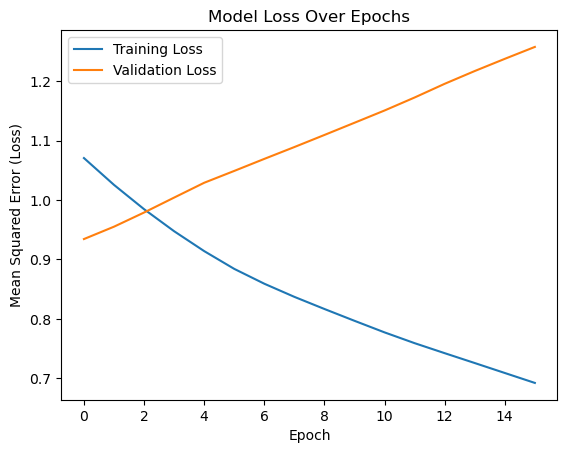

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Validation R² Score: -0.0291
Validation RMSE: 35.0399


In [15]:
SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)


# ------TRAINING------ #
#
df_trainDST = DST_df23.merge(
    DST_df24[['Name', 'FantasyPoints']], 
    on='Name',
    how='inner',               
    suffixes=('_2023', '_2024')
)

# Saving columns to learn from
feature_cols = df_trainDST.drop(columns=['Name', 'FantasyPoints_2024','Position']).columns

X_train_dfDST = df_trainDST[feature_cols]
y_train_dfDST = df_trainDST['FantasyPoints_2024']

# Handling NaN values in the data and Converting all data to floats
X_trainDST = X_train_dfDST.apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy(np.float32)
y_trainDST = y_train_dfDST.apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy() # Keep as 1D array for now

# feature scaling
scaler = StandardScaler()
X_train_scaledDST = scaler.fit_transform(X_trainDST) 
y_scaler = StandardScaler()
y_train_scaledDST = y_scaler.fit_transform(y_trainDST.reshape(-1, 1)).astype(np.float32)


# ------MODEL------ #
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_trainDST.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')  
])

# Compile the model with Adam optimizer and MSE loss
model.compile(optimizer='adam', loss='mse')

# Train the model with early stopping
es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(
    X_train_scaledDST, y_train_scaledDST,
    validation_split=0.15,
    epochs=200,
    batch_size=8,
    callbacks=[es],
    verbose=2
)

# Plotting loss across epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Mean Squared Error (Loss)')
plt.xlabel('Epoch')
plt.legend()
plt.show()


X = X_train_scaledDST
y = y_trainDST 
# scaling target values
y_scaled = y_train_scaledDST 

# Split data into training and validation sets (85% train, 15% validation)
X_train, X_val, y_train_true, y_val_true = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# Predict fantasy points for the validation set using the trained model
y_val_pred_scaled = model.predict(X_val)

# Convert scaled predictions back to the original fantasy points scale
y_val_pred = y_scaler.inverse_transform(y_val_pred_scaled)

# Compute evaluation metrics: R² indicates proportion of variance explained, RMSE is prediction error
r2 = r2_score(y_val_true, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred))

print(f"\nValidation R² Score: {r2:.4f}")
print(f"Validation RMSE: {rmse:.4f}")

In [16]:
# ------PREDICTION (TESTING)------ #
# Predict 2025 Points using 2024 Stats

# Copy 2024 DST data to avoid modifying original dataframe
df_testDST = DST_df24.copy()

X_test_dfDST = df_testDST.drop(columns=['Name', 'FantasyPoints', 'Position']) 
X_test_dfDST = X_test_dfDST.reindex(columns=feature_cols, fill_value=0)
X_testDST = X_test_dfDST.apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy(np.float32)

# Scale test features using the SAME scaler fitted on training data
X_test_scaledDST = scaler.transform(X_testDST)

# Predict the SCALED Fantasy Points
predictions_scaledDST = model.predict(X_test_scaledDST)

# Inverse Transform to get the actual Fantasy Points values
predictions_2025DST = y_scaler.inverse_transform(predictions_scaledDST) 

print("\n--- Predicted 2025 Fantasy Points (based on 2024 stats) ---")
# Combine predictions with player names for readability
df_testDST['Predicted_2025_FP'] = predictions_2025DST.flatten()
DST = df_testDST[['Name', 'Predicted_2025_FP', 'FantasyPoints', 'Position', 'ADP']].sort_values(by='Predicted_2025_FP', ascending=False)
print(DST)
print(DST['Predicted_2025_FP'].head(15).sum())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

--- Predicted 2025 Fantasy Points (based on 2024 stats) ---
                     Name  Predicted_2025_FP  FantasyPoints Position    ADP
0          Denver Broncos         170.812286            239      DST  268.0
14          Chicago Bears         168.260193            164      DST  264.5
18                NY Jets         167.246292            151      DST  158.0
15              Tampa Bay         166.314987            164      DST  238.5
4           Buffalo Bills         165.838898            195      DST  212.5
31      Carolina Panthers         164.928482             82      DST  350.0
25     Indianapolis Colts         164.737228            136      DST  273.0
21  Washington Commanders         163.779160            145      DST  208.0
26              NY Giants         162.198105            131      DST  275.0
10       Baltimore Ravens         162.069168            172      DST  169.0
11         Dallas Cowboys         161.493729            168      

#### Combining all positions for draft pool

In [17]:
df_all_positions = pd.concat([QB, RB, WR, TE, K, DST])
print(df_all_positions.head())



               Name  Predicted_2025_FP FantasyPoints Position    ADP
0     Lamar Jackson         418.023071         511.6       QB   38.0
1        Joe Burrow         354.935638         458.5       QB   68.0
4    Jayden Daniels         329.399139         405.1       QB  100.5
10  Patrick Mahomes         312.613068         334.4       QB   33.0
3        Josh Allen         311.278015         434.4       QB   22.0


### Snake Draft

In [18]:

def get_best_available(player_pool, current_roster=None, sort_column='ADP'):
    """
    Returns the best available player based on the given sort_column.
    """
    available = player_pool[player_pool['Drafted'] == False]

    # Sort ascending for ADP, descending for projections
    if sort_column.upper() == 'ADP':
        available = available.sort_values(by='ADP', ascending=True)
    else:
        available = available.sort_values(by=sort_column, ascending=False)

    return available.iloc[0]


# Max limits for roster
ROSTER_LIMITS = {
    'QB': 2,
    'RB': 6,
    'WR': 6,
    'TE': 2,
    'K': 1,
    'DST': 1
}

# Min requirements for roster
MINIMUM_REQUIRED = {
    'QB': 1,
    'RB': 1,
    'WR': 1,
    'TE': 1,
    'K': 1,
    'DST': 1
}


def plot_model_vs_all_opponents_histogram(model_scores, all_opp_scores, model_name="NN"):
    """
    Plot histogram of model team scores and overlay all individual opponent scores,
    plus shaded regions showing their score ranges.
    """

    # Flatten opponent scores
    flattened_opp_scores = [score for sim_scores in all_opp_scores for score in sim_scores]

    # Compute ranges
    model_min, model_max = min(model_scores), max(model_scores)
    opp_min, opp_max     = min(flattened_opp_scores), max(flattened_opp_scores)

    plt.figure(figsize=(12, 7))

    # Shaded Range for Model Scores 
    plt.axvspan(model_min, model_max, color='blue', alpha=0.1, label=f"{model_name} Score Range")

    # Shaded Range for Opponent Scores 
    plt.axvspan(opp_min, opp_max, color='orange', alpha=0.1, label="Opponent Score Range")

    # Histograms
    plt.hist(model_scores, bins=10, alpha=0.6, color='blue', label=f'{model_name} Team Scores')
    plt.hist(flattened_opp_scores, bins=20, alpha=0.6, color='orange', label='All Opponent Scores')

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    plt.xlabel("Total Fantasy Points", fontsize = 18)
    plt.ylabel("Frequency", fontsize = 18)
    plt.legend(loc="upper left", fontsize = 18)
    plt.tight_layout()
    plt.show()




In [19]:
def run_position_nn_snake_draft(master_pool, num_simulations=200, num_teams=12, rounds=15):
    """
    Snake-draft simulation using the final Keras NN predictions:
      - Your team drafts using NN predictions ('Predicted_2025_FP')
      - Opponents draft using ADP with some randomness
      - Returns average scores across simulations
      - Outputs last simulation teams
    """

    required_cols = ['FantasyPoints', 'Predicted_2025_FP', 'ADP', 'Position', 'Name']
    for col in required_cols:
        if col not in master_pool.columns:
            raise KeyError(f"Master pool is missing required column: '{col}'")

    master_pool = master_pool.copy()
    master_pool['FantasyPoints'] = pd.to_numeric(master_pool['FantasyPoints'], errors='coerce').fillna(0)
    master_pool['Predicted_2025_FP'] = pd.to_numeric(master_pool['Predicted_2025_FP'], errors='coerce').fillna(0)
    master_pool['ADP'] = pd.to_numeric(master_pool['ADP'], errors='coerce').fillna(999.0)

    print("Running Individual Position NN snake-draft simulations...")

    model_scores = []
    baseline_scores = []
    all_opponent_scores = []
    model_wins = 0
    last_sim_teams = None

    for sim in range(num_simulations):
        model_slot = np.random.randint(0, num_teams)
        player_pool = master_pool.copy().reset_index(drop=True)
        player_pool['Drafted'] = False
        teams = {i: [] for i in range(num_teams)}

        for round_num in range(rounds):
            order = list(range(num_teams)) if round_num % 2 == 0 else list(reversed(range(num_teams)))

            for team_idx in order:
                roster = teams[team_idx]
                sort_col = 'Predicted_2025_FP' if team_idx == model_slot else 'ADP'

                # Count players by position in current roster
                pos_counts = {}
                for pos in ROSTER_LIMITS.keys():
                    pos_counts[pos] = sum(1 for p in roster if p['Position'] == pos)

                # Get available players
                available_players = player_pool[player_pool['Drafted'] == False].copy()

                if available_players.empty:
                    continue

                # Calculate remaining picks for this team
                remaining_picks = rounds - len(roster)

                # First priority: enforce minimums if we're running out of picks
                positions_needed = []
                for pos, min_req in MINIMUM_REQUIRED.items():
                    current_count = pos_counts.get(pos, 0)
                    if current_count < min_req:
                        spots_left = min_req - current_count
                        # If we need this position and don't have enough picks left to be flexible
                        if spots_left >= remaining_picks - 1:
                            positions_needed.append(pos)

                if positions_needed:
                    # Must draft from positions we need
                    available_players = available_players[available_players['Position'].isin(positions_needed)]
                else:
                    # Second priority: enforce maximums (don't exceed roster limits)
                    for pos, max_limit in ROSTER_LIMITS.items():
                        if pos_counts.get(pos, 0) >= max_limit:
                            available_players = available_players[available_players['Position'] != pos]

                if available_players.empty:
                    # Fallback: if no players available after filtering, try without position restrictions
                    available_players = player_pool[player_pool['Drafted'] == False].copy()
                    if available_players.empty:
                        continue

                # --- Pick player ---
                TOP_N_OPPONENT = 5
                if sort_col == 'ADP':
                    top_n = available_players.sort_values(by='ADP', ascending=True).head(TOP_N_OPPONENT)
                    pick_idx = top_n.sample(n=1).index[0]
                else:
                    sorted_players = available_players.sort_values(by='Predicted_2025_FP', ascending=False)
                    pick_idx = sorted_players.index[0]

                # Mark as drafted and get player info
                player_pool.loc[pick_idx, 'Drafted'] = True
                
                # Get the row as a dict directly using iloc with the integer position
                int_pos = player_pool.index.get_loc(pick_idx)
                player_dict = {
                    'Name': player_pool.iloc[int_pos]['Name'],
                    'Position': player_pool.iloc[int_pos]['Position'],
                    'FantasyPoints': player_pool.iloc[int_pos]['FantasyPoints'],
                    'Predicted_2025_FP': player_pool.iloc[int_pos]['Predicted_2025_FP'],
                    'ADP': player_pool.iloc[int_pos]['ADP']
                }
                teams[team_idx].append(player_dict)

        # Scoring
        model_team_df = pd.DataFrame(teams[model_slot])
        model_score = model_team_df['FantasyPoints'].sum() if not model_team_df.empty else 0
        model_scores.append(model_score)

        opp_scores = []
        for opp in range(num_teams):
            if opp != model_slot:
                opp_df = pd.DataFrame(teams[opp])
                opp_score = opp_df['FantasyPoints'].sum() if not opp_df.empty else 0
                opp_scores.append(opp_score)
        all_opponent_scores.append(opp_scores)
        baseline_avg = np.mean(opp_scores) if opp_scores else 0
        baseline_scores.append(baseline_avg)

        if opp_scores and model_score > max(opp_scores):
            model_wins += 1

        if sim == num_simulations - 1:
            last_sim_teams = {k: pd.DataFrame(v) for k, v in teams.items()}

    avg_model = np.mean(model_scores)
    avg_baseline = np.mean(baseline_scores)
    diff = avg_model - avg_baseline

    print("\n==============================")
    print("   FINAL NEURAL NETWORK DRAFT RESULTS")
    print("==============================")
    print(f"Avg Model Score:    {avg_model:.2f}")
    print(f"Avg Opponent Score: {avg_baseline:.2f}")
    print(f"Advantage:          {diff:.2f} points")
    print(f"Model Wins:         {model_wins}/{num_simulations} simulations")
    print("==============================")

    # Show last simulation teams
    print("\n=== Last Simulation Drafted Teams ===")
    for team_idx, df in last_sim_teams.items():
        team_label = f"Team {team_idx + 1}"
        if team_idx == model_slot:
            team_label += " (NN Final Model's Team)"

        total_fp = df['Predicted_2025_FP'].sum() if not df.empty else 0
        roster_size = len(df) if not df.empty else 0
        print(f"\n{team_label} — Roster Size: {roster_size}/15 — Total Projected Fantasy Points: {total_fp:.2f}")

        if not df.empty:
            print(df[['Name', 'Position', 'Predicted_2025_FP', 'FantasyPoints', 'ADP']])
        else:
            print("No players drafted")

    return {
        "avg_model": avg_model,
        "avg_baseline": avg_baseline,
        "difference": diff,
        "model_wins": model_wins,
        "last_sim_teams": last_sim_teams,
        "model_scores": model_scores,
        "baseline_scores": baseline_scores,
        "all_opponent_scores": all_opponent_scores
    }

In [20]:
nn_position_results = run_position_nn_snake_draft(df_all_positions, num_simulations=100)

Running Individual Position NN snake-draft simulations...

   FINAL NEURAL NETWORK DRAFT RESULTS
Avg Model Score:    3643.65
Avg Opponent Score: 2720.83
Advantage:          922.82 points
Model Wins:         100/100 simulations

=== Last Simulation Drafted Teams ===

Team 1 — Roster Size: 15/15 — Total Projected Fantasy Points: 2359.21
                   Name Position  Predicted_2025_FP  FantasyPoints    ADP
0           CeeDee Lamb       WR         174.206680          263.4    2.5
1          Deebo Samuel       WR         153.447113          154.7   26.5
2         Davante Adams       WR         185.935547          241.3   21.5
3            James Cook       RB         153.389191          266.7   33.5
4        Dalton Kincaid       TE         116.656837          100.8   49.5
5        Christian Kirk       WR         164.751663           71.0   67.5
6          Chris Godwin       WR         170.344193          137.8   76.0
7      Christian Watson       WR         164.296432          105.7   99

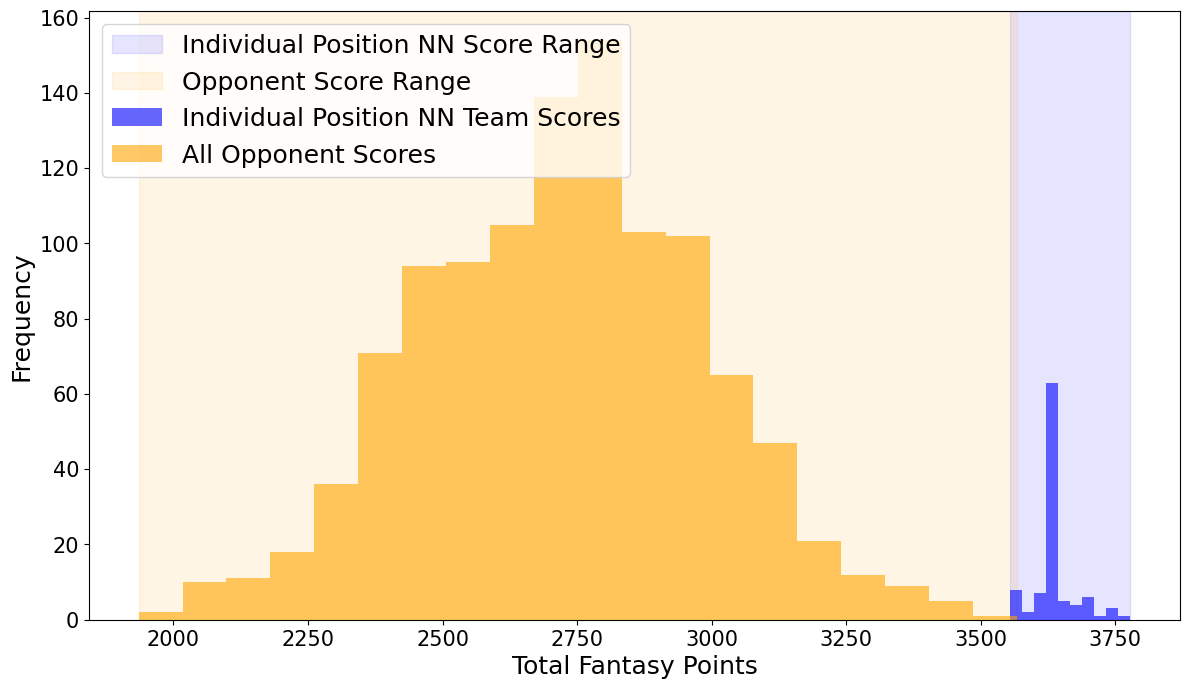

In [21]:
plot_model_vs_all_opponents_histogram(
    nn_position_results["model_scores"],
    nn_position_results["all_opponent_scores"],
    model_name="Individual Position NN"
)

In [22]:
# computing more stats for results
def compute_score_distribution_gap(model_scores, all_opp_scores):
    """
    Computes the gap between the lower bound of the model score distribution 
    and the upper bound of the opponent score distribution.

    Gap = min(model_scores) - max(opponent_scores)

    A positive gap means the two distributions DO NOT overlap.
    A negative gap means they DO overlap.
    """

    # Flatten opponent scores
    flattened_opp_scores = [s for sim in all_opp_scores for s in sim]

    # Compute bounds
    model_low = min(model_scores)
    opp_high = max(flattened_opp_scores)

    # Compute the gap
    gap = model_low - opp_high

    print("Lowest model score:      ", model_low)
    print("Highest opponent score:  ", opp_high)
    print("Score distribution gap:  ", gap)

    return gap

gap_value = compute_score_distribution_gap(nn_position_results["model_scores"], nn_position_results["all_opponent_scores"])
print("Final gap:", gap_value)

Lowest model score:       3555.0
Highest opponent score:   3567.4000000000005
Score distribution gap:   -12.400000000000546
Final gap: -12.400000000000546
